<a href="https://colab.research.google.com/github/paulodreher/data_science/blob/main/Audio_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import wavfile as wav
from scipy.fftpack import fft,fftfreq
import struct
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy import signal

<h2>Plot Audio</h2>

In [ ]:
def plot_audio(fs,data):
    plt.figure(figsize=(12, 4))
    time=np.linspace(0, len(data)/fs, num=len(data))
    plt.plot(time,data)

<h2>Signal FFT</h2>

In [ ]:
# fourier transform and frequency domain
def fft_audio(fs,data):
    fft_data = fft(data)
    d = len(fft_data)/2
    plt.figure(figsize=(12, 4))
    plt.plot(abs(fft_data[0:1500]),'b')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<h2>Import Audio File</h2>

('sampling rate: ', 44100, 'Hz')
('bit depth: ', 16)
('duration: ', 1, ' second')
('number of samples: ', 44101)


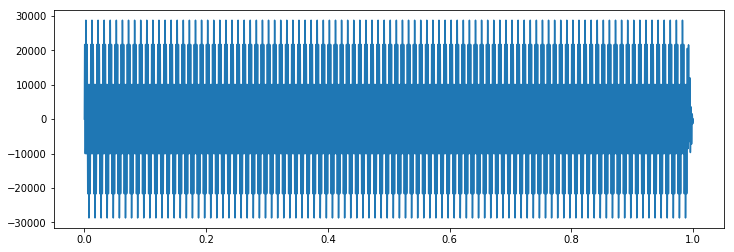

In [ ]:
filename = 'audio_freqs.wav'
fs, data = wav.read(filename)

wave_file = open(filename,"rb")
riff_fmt = wave_file.read(36)
bit_depth_string = riff_fmt[-2:]
bit_depth = struct.unpack("H",bit_depth_string)[0]
print('sampling rate: ',fs,'Hz')
print('bit depth: ',bit_depth)
print('duration: ',data.shape[0]/fs,' second')
print('number of samples: ',len(data))

plot_audio(fs,data)

ipd.Audio(data, rate = fs)

#fs, data = wavfile.read('audio.wav')

<h2>Plot FTT</h2>

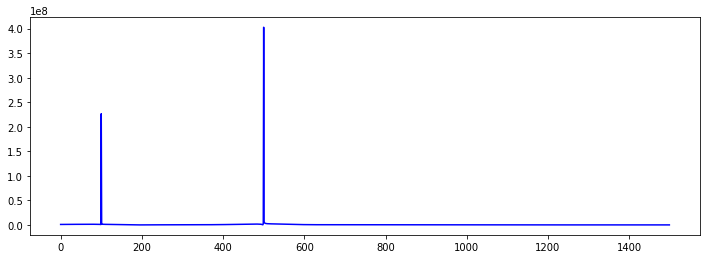

In [ ]:
fft_audio(fs,data)

<h2> High Pass Filter </h2>

In [ ]:
fc = 300
w = fc / (fs / 2.)
b, a = signal.butter(4, w, 'low')
data_fil = signal.filtfilt(b, a, data)

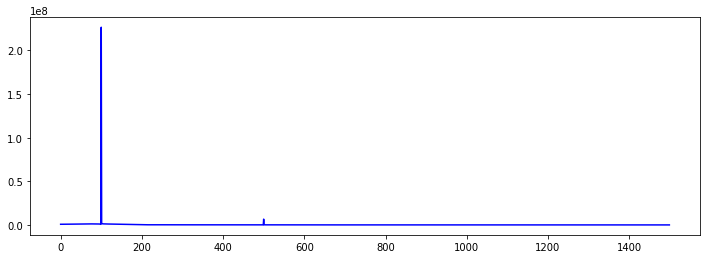

In [ ]:
fft_audio(fs,data_fil)

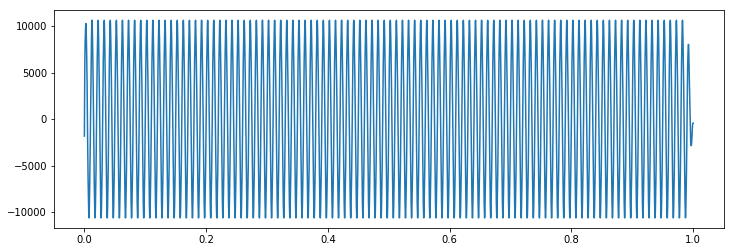

In [ ]:
plot_audio(fs,data_fil)